# Fitting Logarithmic Daily Returns Squared With NLS
<hr>
Importing data for AAPL

In [1]:
library("quantmod")
getSymbols(Symbols = 'AAPL', src = 'yahoo', from = '2016-01-01', to = '2017-01-01')
typeof(AAPL$AAPL.Close[1])

Loading required package: xts
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: TTR
Version 0.4-0 included new data defaults. See ?getSymbols.
‘getSymbols’ currently uses auto.assign=TRUE by default, but will
use auto.assign=FALSE in 0.5-0. You will still be able to use
‘loadSymbols’ to automatically load data. getOption("getSymbols.env")
and getOption("getSymbols.auto.assign") will still be checked for
alternate defaults.

This message is shown once per session and may be disabled by setting 
options("getSymbols.warning4.0"=FALSE). See ?getSymbols for details.

Please see the Warning section of ‘?getSymbols.yahoo’ for details.

This message is shown once per session and may be disabled by setting
options("getSymbols.yahoo.warning"=FALSE).


[1] "AAPL"

[1] "double"

In [2]:
head(AAPL)
length(AAPL$AAPL.Close)
year_data <- AAPL$AAPL.Close

           AAPL.Open AAPL.High AAPL.Low AAPL.Close AAPL.Volume AAPL.Adjusted
2016-01-04    102.61    105.37   102.00     105.35    67649400     100.62618
2016-01-05    105.75    105.85   102.41     102.71    55791000      98.10455
2016-01-06    100.56    102.37    99.87     100.70    68457400      96.18465
2016-01-07     98.68    100.13    96.43      96.45    81094400      92.12524
2016-01-08     98.55     99.11    96.76      96.96    70798000      92.61236
2016-01-11     98.97     99.06    97.34      98.53    49739400      94.11198

[1] 252

Calculating log of squared daily returns

In [3]:
head(dailyReturn(year_data))
daily_returns_squared <- cumsum(dailyReturn(year_data)^2)
log_daily_returns_squared <- log(daily_returns_squared)
log_daily_returns_squared <- log_daily_returns_squared[-1]

           daily.returns
2016-01-04   0.000000000
2016-01-05  -0.025059317
2016-01-06  -0.019569682
2016-01-07  -0.042204569
2016-01-08   0.005287735
2016-01-11   0.016192244

Fitting all data with nls

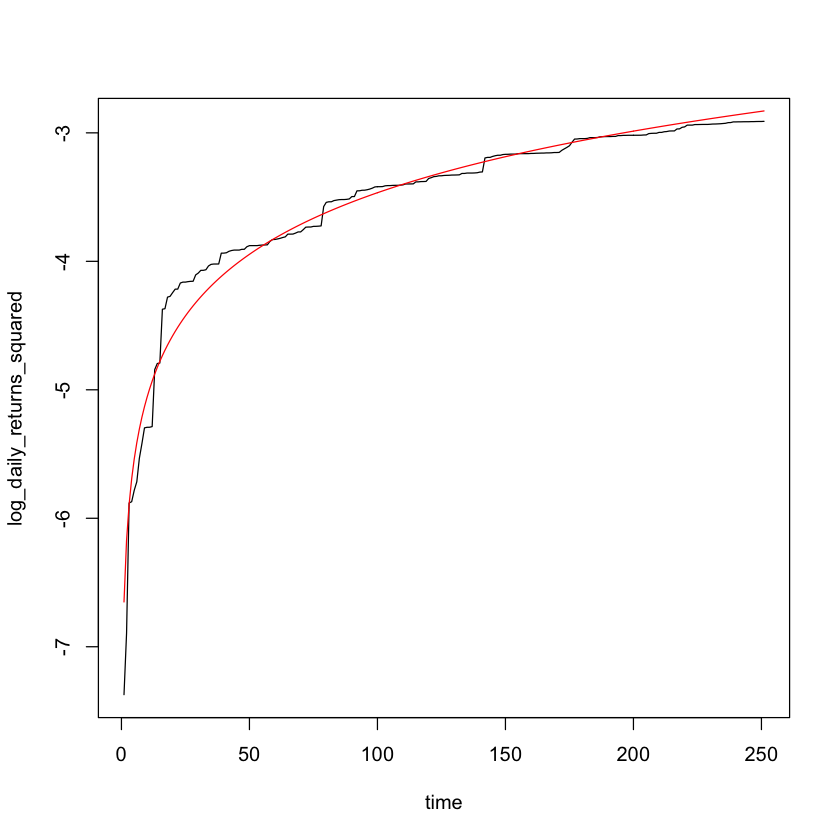

In [4]:
time <- 1:length(log_daily_returns_squared)
log_nonlinear_model <- nls(log_daily_returns_squared ~ a * log(time) + k, start = list(a = .25, k = -9))
plot(x = time, y = log_daily_returns_squared, type = 'l')
lines(x = time, y = predict(log_nonlinear_model), type = 'l', col = 'red')

Fitting test data (75% of total data)

[1] 251

Warning message in nls(test_log_returns_squared ~ Const + A * log(test_time)):
“No starting values specified for some parameters.
Initializing ‘Const’, ‘A’ to '1.'.
Consider specifying 'start' or using a selfStart model”

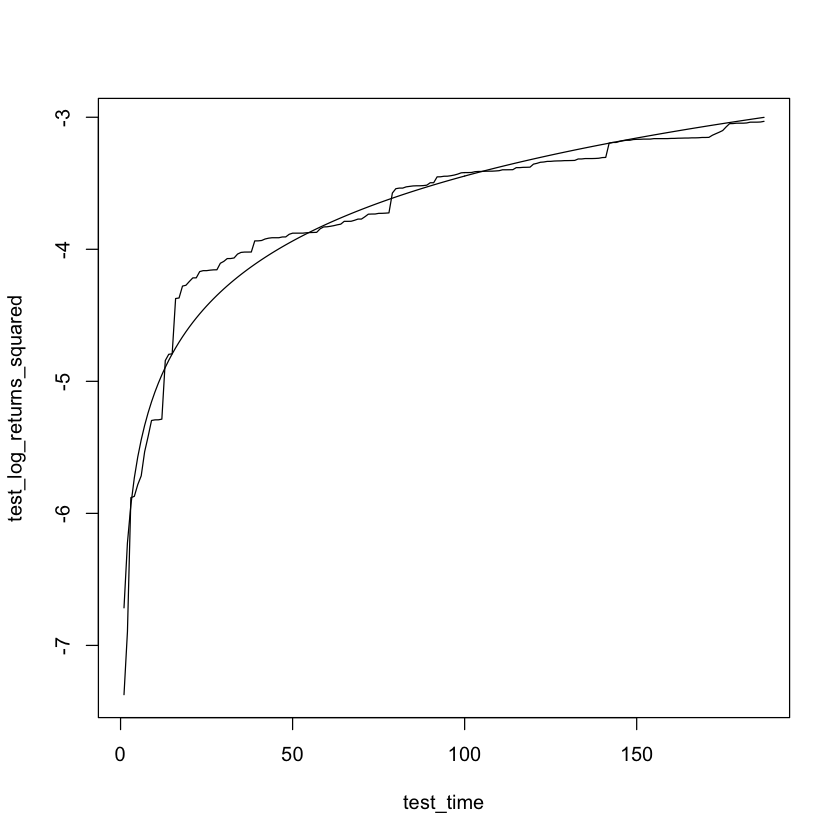

In [12]:
length(log_daily_returns_squared)
test_log_returns_squared <- log_daily_returns_squared[0:187]
test_time <- 1:length(test_log_returns_squared)
plot(x = test_time, y=test_log_returns_squared, type = "l")
nlmod = nls(test_log_returns_squared ~ Const+A*log(test_time))
lines(x=test_time, y=predict(nlmod))

In [13]:
summary(nlmod)


Formula: test_log_returns_squared ~ Const + A * log(test_time)

Parameters:
      Estimate Std. Error t value Pr(>|t|)    
Const -6.71522    0.04558 -147.31   <2e-16 ***
A      0.71005    0.01047   67.83   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.136 on 185 degrees of freedom

Number of iterations to convergence: 1 
Achieved convergence tolerance: 2.887e-09


Testing all data on model trained on test data

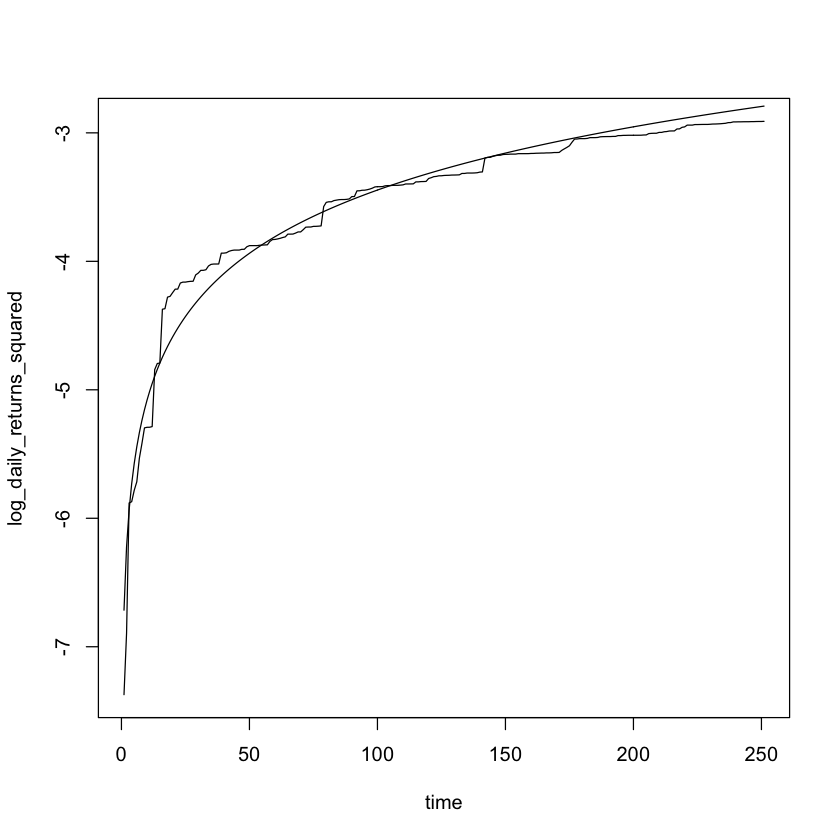

In [15]:
plot(x = time, y = log_daily_returns_squared, type = 'l')
lines(x = time, y = -6.71522+0.71005*log(time), type = 'l')